In [1]:
import pandas as pd
import numpy as np

In [2]:
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True) :
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l, 'Max Length': max_l, 'Level_Values' : unq} )
    return levels

In [3]:
df=pd.read_csv("/Users/onkar/Downloads/archive/SBAnational.csv")

# https://www.kaggle.com/code/kevinm6720/sba-loan-approval-analysis
# https://www.kaggle.com/code/mirbektoktogaraev/should-this-loan-be-approved-or-not

/Users/onkar/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [5]:
df.shape

(899164, 27)

# DATA CLEANING

In [6]:
# According to the dataset documentation provided :

# There are a number of variables that consistently emerge as indicators of risk that could explain
# the variation of loan default rates. Seven variables, along with some exploratory analysis, are 
# discussed below including Location (State), Industry, Gross Disbursement, New vs Established Business, 
# Loans Backed by Real Estate, Economic Recession, and SBA's Guaranteed Portion of Approved Loan.

In [7]:
df=df.drop_duplicates(keep='first')   # delete duplicates, if any

In [8]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [9]:
df.dropna(subset=['MIS_Status','RevLineCr','LowDoc','Bank','BankState',
                  'Name','City','State','NewExist','DisbursementDate'],inplace=True)

# dropped all but ChgOffDate null values as we do not really need that column in particular

In [10]:
df['MIS_Status'].value_counts()
# we want to see how many loans have defaulted, indicated by status as CHGOFF

P I F     730199
CHGOFF    156041
Name: MIS_Status, dtype: int64

In [11]:
df=df.drop(axis=1,columns=['ChgOffDate'])

In [12]:
describe_more(df)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,LoanNr_ChkDgt,886240,int64,10,10,"{1000014003: 1, 5934054006: 1, 5933964006: 1, ..."
1,Name,769838,object,1,30,"{'SUBWAY': 1259, 'QUIZNO'S SUBS': 433, 'COLD S..."
2,City,32298,object,1,30,"{'LOS ANGELES': 11467, 'HOUSTON': 10129, 'NEW ..."
3,State,51,object,2,2,"{'CA': 129398, 'TX': 69348, 'NY': 56869, 'FL':..."
4,Zip,33501,int64,1,5,"{10001: 919, 90015: 917, 93401: 749, 90010: 73..."
5,Bank,5788,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 86075, 'WELLS F..."
6,BankState,56,object,2,2,"{'CA': 116737, 'NC': 78708, 'IL': 64919, 'OH':..."
7,NAICS,1311,int64,1,6,"{0: 198267, 722110: 27772, 722211: 19338, 8111..."
8,ApprovalDate,9786,object,8,9,"{'7-Jul-93': 1120, '30-Jan-04': 1028, '8-Jul-9..."
9,ApprovalFY,64,object,4,5,"{2006: 75657, 2007: 71406, 2003: 57688, 2005: ..."


In [13]:
# we see here that some records of DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv & SBA_Appv
# are being read as objects (strings) instead of numbers (integers)

# some things we note or want to do are:
# drop records that dont have Y or N values of LowDoc
# some ApprovalFY records are also not integers
# drop NewExist records that have value 0
# convert ApprovalDate and DisbursementDate columns to datetime values

In [14]:
cols_mess=["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]
df[cols_mess]=df[cols_mess].astype(str).replace("[']","",regex=True)   # drop single quotation marks
df[cols_mess]=df[cols_mess].astype(str).replace("[,]","",regex=True)   # drop commas
df[cols_mess]=df[cols_mess].astype(str).replace("[$]","",regex=True)   # drop $ sign

df[cols_mess]=df[cols_mess].astype(float)   # convert the cols_mess columns to float data type

df[cols_mess].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886240 entries, 0 to 899163
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   DisbursementGross  886240 non-null  float64
 1   BalanceGross       886240 non-null  float64
 2   ChgOffPrinGr       886240 non-null  float64
 3   GrAppv             886240 non-null  float64
 4   SBA_Appv           886240 non-null  float64
dtypes: float64(5)
memory usage: 40.6 MB


In [15]:
df["ApprovalFY"].unique()   # note that some years are within quotation marks and one is followed by an A

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1983, 1973, 1984, 2007, 1985, 1986, 1987,
       2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992, 1993,
       2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004', '1994',
       '1979', '1976', '1975', '1974', '1977', '1981', '1982', '1983',
       '1984', '1978', '1980', '1968', '1976A', '1969', '1995', '1970',
       '2005', '1996', '1971', 1996, 1971], dtype=object)

In [16]:
df["ApprovalFY"]=df["ApprovalFY"].astype(str).replace("'","",regex=True)
df["ApprovalFY"]=df["ApprovalFY"].astype(str).replace("A","",regex=True)

df["ApprovalFY"]=df["ApprovalFY"].astype(int)   # convert ApprovalFY dtype from object to int

df["ApprovalFY"].dtype

dtype('int64')

In [17]:
df = df[(df['LowDoc']=='Y') | (df['LowDoc']=='N')]   # dropped all but Y/N records in LowDoc
df['LowDoc'].isna().sum()

0

In [18]:
df = df[(df['NewExist']==1) | (df['NewExist']==2)]   # dropped unspecified values (0) in NewExist
df["NewExist"]=df["NewExist"].astype(int)

print(df["NewExist"].isna().sum())
print(df["NewExist"].dtype)

0
int64


In [19]:
# Some of the fields that are considered flags already but aren't necessarily in a useable format right now. 
# These include the NewExist, RevLineCr, LowDoc, and MIS_Status fields; some of which need fixing. 

In [20]:
df['MIS_Status'].where(~(df["MIS_Status"]=='P I F'), other=0, inplace=True)    # replace PIF as 0
df['MIS_Status'].where(~(df["MIS_Status"]=='CHGOFF'), other=1, inplace=True)   # replace CHGOFF as 1

df["MIS_Status"]=df["MIS_Status"].astype(int)
df["MIS_Status"].dtype

dtype('int64')

In [21]:
df['LowDoc'].where(~(df["LowDoc"]=='N'), other=0, inplace=True)   # replace N as 0
df['LowDoc'].where(~(df["LowDoc"]=='Y'), other=1, inplace=True)   # replace Y as 1

df["LowDoc"]=df["LowDoc"].astype(int)
df["LowDoc"].dtype

dtype('int64')

In [22]:
# we can now work to clean RevLineCr which has a large records (especially of 0) having unneccessary values

In [23]:
df["RevLineCr"].value_counts()

N    412142
0    256725
Y    198045
T     15091
1        22
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [24]:
df = df[(df['RevLineCr']=='Y') | (df['RevLineCr']=='N') | (df['RevLineCr']=='0')]
df["RevLineCr"].value_counts()   # dropped all garbage value of RevLineCr and left 0 as unknown factor

N    412142
0    256725
Y    198045
Name: RevLineCr, dtype: int64

In [25]:
df['RevLineCr'].where(~(df["RevLineCr"]=='N'), other=0, inplace=True)   # replace N as 0
df['RevLineCr'].where(~(df["RevLineCr"]=='Y'), other=1, inplace=True)   # replace Y as 1
df['RevLineCr'].where(~(df["RevLineCr"]==0), other=-1, inplace=True)    # replace 0 as -1

df["RevLineCr"]=df["RevLineCr"].astype(int)
df["RevLineCr"].dtype

dtype('int64')

In [26]:
from datetime import date

df[['ApprovalDate','DisbursementDate']]=df[['ApprovalDate','DisbursementDate']].apply(
                                            lambda x: pd.to_datetime(x,errors = 'coerce'))
# Convert ApprovalDate and DisbursementDate columns to datetime values

# https://stackoverflow.com/questions/39992411/to-datetime-value-error-at-least-that-year-month-day-must-be-specified-pand

In [27]:
df.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866912 entries, 0 to 899163
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      866912 non-null  int64         
 1   Name               866912 non-null  object        
 2   City               866912 non-null  object        
 3   State              866912 non-null  object        
 4   Zip                866912 non-null  int64         
 5   Bank               866912 non-null  object        
 6   BankState          866912 non-null  object        
 7   NAICS              866912 non-null  int64         
 8   ApprovalDate       866912 non-null  datetime64[ns]
 9   ApprovalFY         866912 non-null  int64         
 10  Term               866912 non-null  int64         
 11  NoEmp              866912 non-null  int64         
 12  NewExist           866912 non-null  int64         
 13  CreateJob          866912 non-null  int64   

# Feature Engineering

In [29]:
### We have franchise codes which are unneccessary, we need only know whether a business is a franchise or not

df.loc[(df['FranchiseCode'] <= 1),'Franchise'] = 0
df.loc[(df['FranchiseCode'] > 1),'Franchise'] = 1

df["Franchise"]=df["Franchise"].astype(int)      # Convert datatype of Franchise to int
df.drop(columns="FranchiseCode", inplace=True)   # Drop FranchiseCode since its of no particular use to us

In [30]:
# Create a new column named "Industry" with the industry the NAICS code represents

df['Industry'] = df['NAICS'].astype('str').apply(lambda x: x[:2])   # Select only first 2 numbers of NAICS code

df['Industry'] = df['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
    '81': 'Other_no_pub',
    '92': 'Public_Admin'
})   # Map the approprate industry to each record based on the first two digits of the NAICS code

df.dropna(subset=['Industry'], inplace=True)   # Remove records where Industry is NaN (NAICS code was 0)
df.drop(columns="NAICS", inplace=True)         # Drop NAICS since its of no particular use to us

In [31]:
df['SBA_ApvPct']=round(df['SBA_Appv']/df['GrAppv'],3)
# Feature showing the guaranteed amount as percentage of the gross loan amount

In [32]:
df['RealEstate']=np.where(df['Term']>=240,1,0)
# Feature for loans backed by Real Estate (loans with a term of at least 20 years)

In [33]:
df['DisbursementFY']=df['DisbursementDate'].map(lambda x: x.year)   # find year of disbursement

df['GreatRecession']=np.where(((2007 <= df['DisbursementFY']) & (df['DisbursementFY'] <= 2009)) | 
                        ((df['DisbursementFY'] < 2007) & (df['DisbursementFY'] + (df['Term']/12) >= 2007)), 1, 0)

# Feature for loans active during the Great Recession (2007-2009)

In [34]:
df=df[df['DisbursementFY']<=2010]   # Select only records with a disbursement year through 2010

# According to dataset document: An emphasis is placed on the default rates of loans with a disbursement 
# date through 2010. We chose this time period for two reasons. We want to account for variation due to 
# the Great Recession (December 2007 to June 2009)4 ; so loans disbursed before, during, and after this 
# time frame are needed. Secondly, we restrict the time frame to loans by  excluding those disbursed 
# after 2010 due to the fact the term of a loan is frequently 5 or more years.

In [35]:
### Since we are done with feature engineering, we will now drop columns that are not of use to us

df.drop(columns=['LoanNr_ChkDgt','Name','City','Zip','Bank','BankState',
                    'ChgOffPrinGr','ApprovalDate','DisbursementDate'], inplace=True)

# LoanNr_ChkDgt, Name, City, Zip, Bank, BankState - provide no value to the actual analysis
# ApprovalDate -  unneccessary as we already have ApprovalFY
# DisbursementDate - replaced by DisbursementFY
# ChgOffPrinGr - amount not of use to us, we already have MIS_Status
# We dont drop State as we want to check the effect of demograpphy on the loan default


In [36]:
df.dtypes   # Now that we're done with data cleaning, lets check the datatype of all features

State                 object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist               int64
CreateJob              int64
RetainedJob            int64
UrbanRural             int64
RevLineCr              int64
LowDoc                 int64
DisbursementGross    float64
BalanceGross         float64
MIS_Status             int64
GrAppv               float64
SBA_Appv             float64
Franchise              int64
Industry              object
SBA_ApvPct           float64
RealEstate             int64
DisbursementFY         int64
GreatRecession         int64
dtype: object

# Data Analysis

In [37]:
df.describe()

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv,Franchise,SBA_ApvPct,RealEstate,DisbursementFY,GreatRecession
count,651920.000000,651920.000000,651920.000000,651920.000000,651920.000000,651920.000000,651920.000000,651920.000000,651920.000000,6.519200e+05,651920.000000,651920.000000,6.519200e+05,6.519200e+05,651920.000000,651920.000000,651920.000000,651920.000000,651920.000000
mean,2002.731663,104.163400,9.849327,1.277890,2.154142,4.985414,0.931240,-0.109023,0.101431,1.933206e+05,4.039845,0.201485,1.826620e+05,1.404633e+05,0.051210,0.684349,0.146535,2002.750885,0.766846
std,4.803855,75.386187,62.634320,0.447959,14.704118,20.854255,0.595984,0.812865,0.301899,2.841529e+05,1692.844479,0.401110,2.800809e+05,2.283622e+05,0.220427,0.175334,0.353642,4.737425,0.422840
min,1984.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,4.000000e+03,0.000000,0.000000,1.000000e+03,5.000000e+02,0.000000,0.028000,0.000000,1984.000000,0.000000
25%,2001.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,3.743075e+04,0.000000,0.000000,3.000000e+04,1.750000e+04,0.000000,0.500000,0.000000,2000.000000,1.000000
50%,2004.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,9.200000e+04,0.000000,0.000000,7.500000e+04,5.000000e+04,0.000000,0.750000,0.000000,2004.000000,1.000000
75%,2006.000000,120.000000,9.000000,2.000000,2.000000,5.000000,1.000000,1.000000,0.000000,2.190062e+05,0.000000,0.000000,2.000000e+05,1.500000e+05,0.000000,0.850000,0.000000,2006.000000,1.000000
max,2011.000000,569.000000,9999.000000,2.000000,5621.000000,9500.000000,2.000000,1.000000,1.000000,1.144632e+07,996262.000000,1.000000,5.000000e+06,4.500000e+06,1.000000,1.000000,1.000000,2010.000000,1.000000


In [38]:
# Things to note:
# 1. Mean of SBA Approved Percentage is 68.43% of total loan amount needed
# 2. Most loans were disbursed between 1998-2007 (approval FY)
# 3. Loans backed by Real Estate are 14.65% of total loans
# 4. An average of 76.68% loans were active during the Great Recession (2007-2009)
# 5. Only 5% of loans were given to Franchises, while 27.78% loans were given to new businesses
# 6. About 93% of loans were given to businesses in an Urban area
# 7. Average term of loan was around 7.67 years with a std. dev. of 2.25 years
# 8. About 10% of loans sanctioned were LowDoc program (1 page loan doc for amount <150k)
# 9. Average loan Gross Disbursement was around 193k with under 75% of them being around 200k

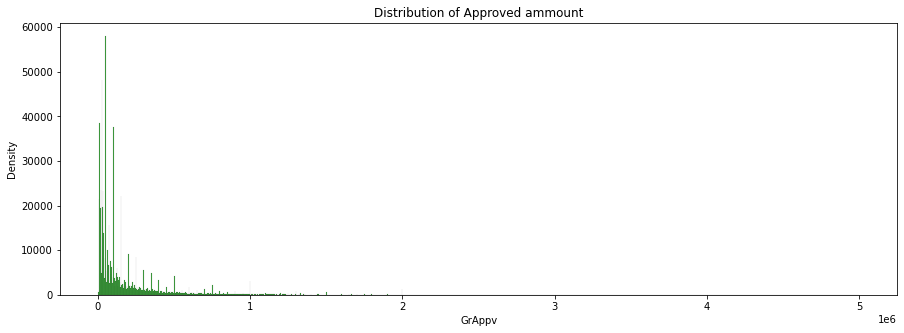

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.histplot(df.GrAppv, color="green", kde=False)
plt.ylabel('Density')
plt.title('Distribution of Approved ammount')
plt.show()

# this plot shows the right skewedness of GrAppv

In [40]:
df['GrAppv']=np.log(df['GrAppv'])   # Fix skewness of GrAppv using log function

# Data Visualization

/var/folders/y6/9n82f6fd5w92s3s_w1m1xzz00000gn/T/ipykernel_81970/3365140430.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)
/var/folders/y6/9n82f6fd5w92s3s_w1m1xzz00000gn/T/ipykernel_81970/3365140430.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)


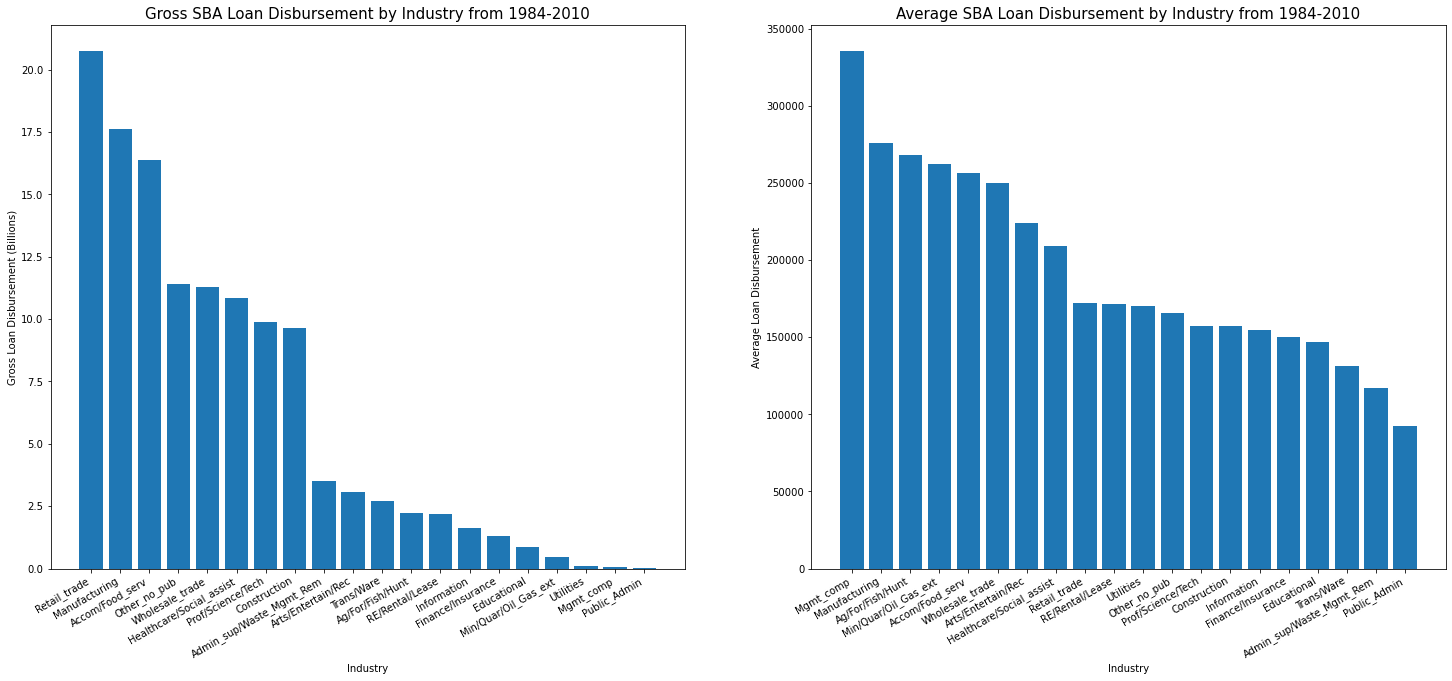

In [41]:
# Total/Average disbursed loan amount by industry
# Create a groupby object on Industry for use in visualization
industry_group = df.groupby(['Industry'])

# Data frames based on groupby by Industry looking at aggregate and average values
df_industrySum = industry_group.sum().sort_values('DisbursementGross', ascending=False)
df_industryAve = industry_group.mean().sort_values('DisbursementGross', ascending=False)

# Establish figure for placing bar charts side-by-side
fig = plt.figure(figsize=(25, 10))

# Add subplots to figure to build 1x2 grid and specify position of each subplot
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# ______ Bar chart 1 = Gross SBA Loan Disbursement by Industry ______

ax1.bar(df_industrySum.index, df_industrySum['DisbursementGross'] / 1000000000)
ax1.set_xticklabels(df_industrySum.index, rotation=30, horizontalalignment='right', fontsize=10)

ax1.set_title('Gross SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax1.set_xlabel('Industry')
ax1.set_ylabel('Gross Loan Disbursement (Billions)')

# ______ Bar chart 2 = Average SBA Loan Disbursement by Industry ______

ax2.bar(df_industryAve.index, df_industryAve['DisbursementGross'])
ax2.set_xticklabels(df_industryAve.index, rotation=30, horizontalalignment='right', fontsize=10)

ax2.set_title('Average SBA Loan Disbursement by Industry from 1984-2010', fontsize=15)
ax2.set_xlabel('Industry')
ax2.set_ylabel('Average Loan Disbursement')

plt.show()

/var/folders/y6/9n82f6fd5w92s3s_w1m1xzz00000gn/T/ipykernel_81970/2121732270.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1a.set_xticklabels(df.groupby(['Industry', 'MIS_Status'])['Industry'].count().unstack('MIS_Status').index,


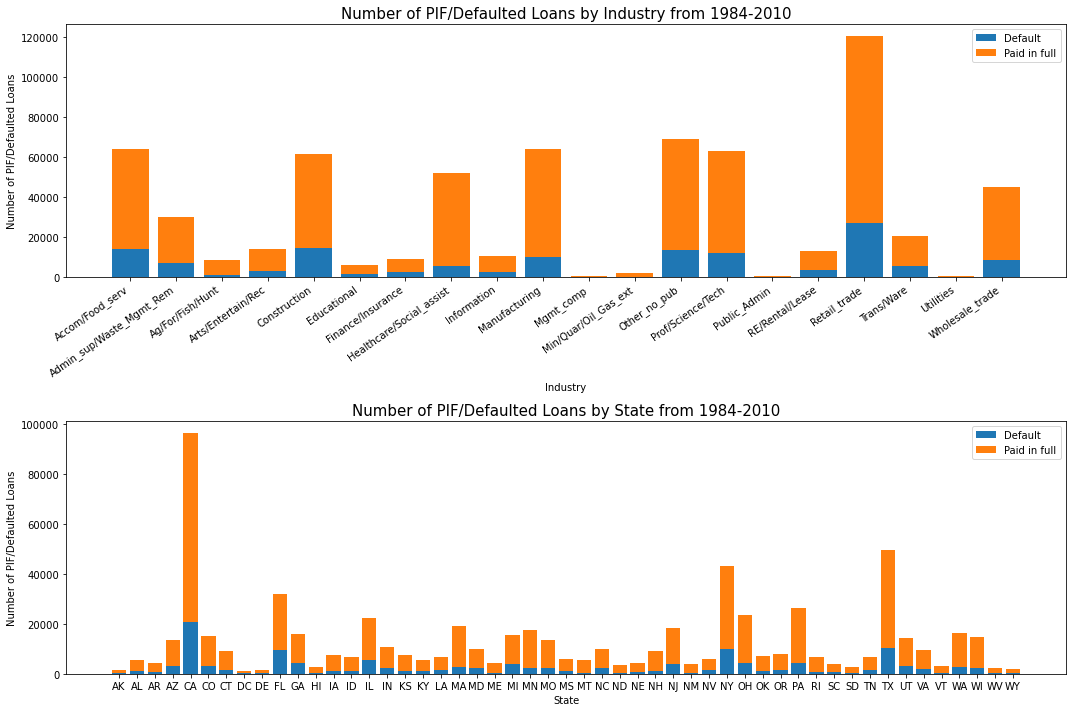

In [42]:
# Paid in full and defaulted loans

fig3 = plt.figure(figsize=(15, 10))

ax1a = plt.subplot(2, 1, 1)
ax2a = plt.subplot(2, 1, 2)

# Function for creating stacked bar charts grouped by desired column
# df = original data frame, col = x-axis grouping, stack_col = column to show stacked values
# Essentially acts as a stacked histogram when stack_col is a flag variable
def stacked_setup(df, col, axes, stack_col='MIS_Status'):
    data = df.groupby([col, stack_col])[col].count().unstack(stack_col)
    data.fillna(0)

    axes.bar(data.index, data[1], label='Default')
    axes.bar(data.index, data[0], bottom=data[1], label='Paid in full')


# ______ Number of Paid in full and defaulted loans by INDUSTRY ______

stacked_setup(df=df, col='Industry', axes=ax1a)
ax1a.set_xticklabels(df.groupby(['Industry', 'MIS_Status'])['Industry'].count().unstack('MIS_Status').index,
                     rotation=35, horizontalalignment='right', fontsize=10)

ax1a.set_title('Number of PIF/Defaulted Loans by Industry from 1984-2010', fontsize=15)
ax1a.set_xlabel('Industry')
ax1a.set_ylabel('Number of PIF/Defaulted Loans')
ax1a.legend()

# ______ Number of Paid in full and defaulted loans by STATE ______

stacked_setup(df=df, col='State', axes=ax2a)

ax2a.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax2a.set_xlabel('State')
ax2a.set_ylabel('Number of PIF/Defaulted Loans')
ax2a.legend()

plt.tight_layout()
plt.show()

In [43]:
# Check default percentage by Industry

def_ind = df.groupby(['Industry', 'MIS_Status'])['Industry'].count().unstack('MIS_Status')
def_ind['Def_Percent'] = def_ind[1]/(def_ind[1] + def_ind[0])
def_ind

MIS_Status,0,1,Def_Percent
Industry,,,
Accom/Food_serv,49795,14140,0.221162
Admin_sup/Waste_Mgmt_Rem,23214,6926,0.229794
Ag/For/Fish/Hunt,7586,779,0.093126
Arts/Entertain/Rec,10936,2841,0.206213
Construction,47094,14378,0.233895
Educational,4516,1434,0.241008
Finance/Insurance,6326,2507,0.283822
Healthcare/Social_assist,46500,5387,0.103822
Information,7980,2636,0.248304


In [44]:
# Check Default percentage by State

def_state = df.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state

MIS_Status,0,1,Def_Percent
State,,,
AK,1259,127,0.091631
AL,4232,1140,0.212211
AR,3374,817,0.194942
AZ,10187,3202,0.239152
CA,75395,20817,0.216366
CO,11957,3220,0.212163
CT,7738,1402,0.153392
DC,925,348,0.273370
DE,1258,340,0.212766


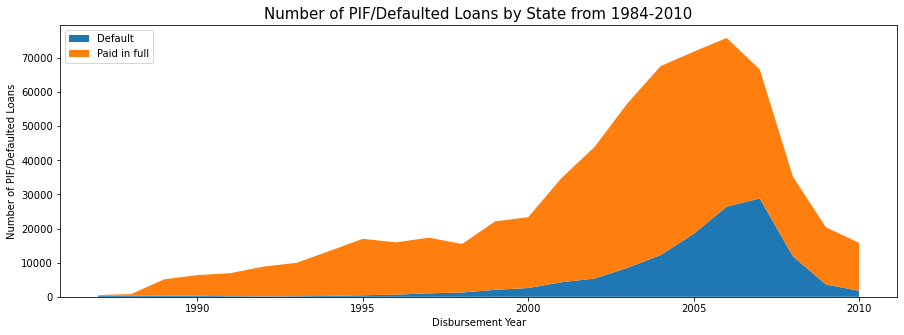

In [45]:
# ______ Paid in full and Defaulted loans by DisbursementFY ______

# We use a stacked area chart here since it's time series data
fig4, ax4 = plt.subplots(figsize=(15, 5))

stack_data = df.groupby(['DisbursementFY', 'MIS_Status'])['DisbursementFY'].count().unstack('MIS_Status')
x = stack_data.index
y = [stack_data[1], stack_data[0]]

ax4.stackplot(x, y, labels=['Default', 'Paid in full'])
ax4.set_title('Number of PIF/Defaulted Loans by State from 1984-2010', fontsize=15)
ax4.set_xlabel('Disbursement Year')
ax4.set_ylabel('Number of PIF/Defaulted Loans')
ax4.legend(loc='upper left')

plt.show()

# It can be clearly seen that most loans have defaulted in the time-period leading up to the Great Reccession 2008
# Also note how the number of loans have icreased until the Great Reccesion and then sharply decreased

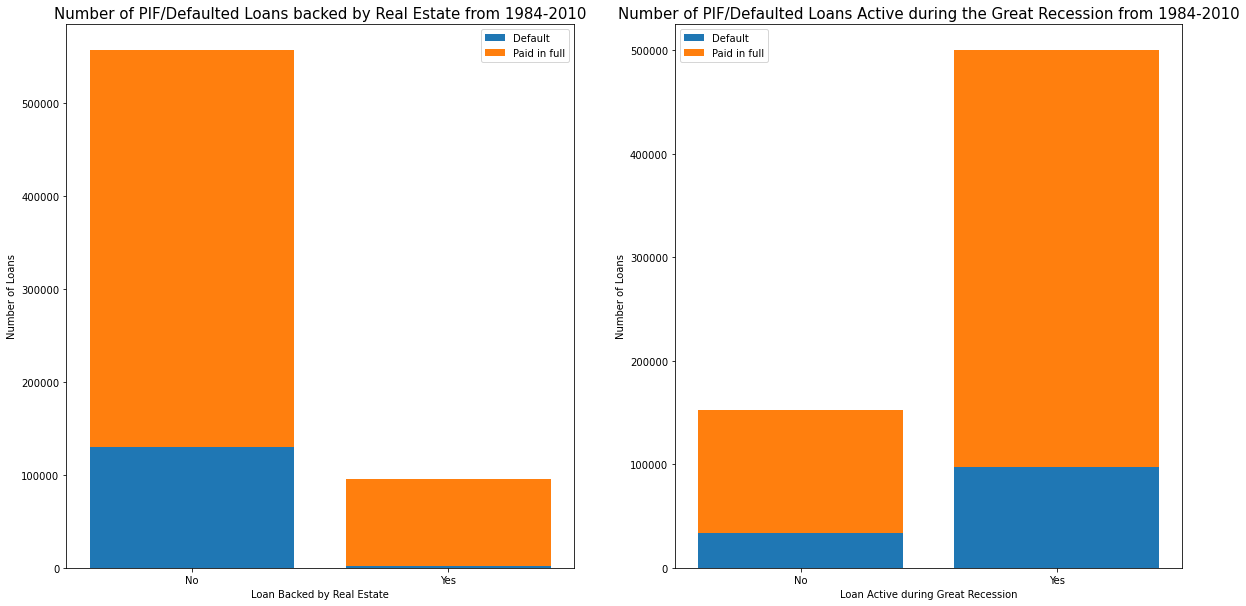

In [46]:
# ______ Paid in full and defaulted loans backed by Real Estate ______

fig5 = plt.figure(figsize=(20, 10))

ax1b = fig5.add_subplot(1, 2, 1)
ax2b = fig5.add_subplot(1, 2, 2)

stacked_setup(df=df, col='RealEstate', axes=ax1b)
ax1b.set_xticks(df.groupby(['RealEstate', 'MIS_Status'])['RealEstate'].count().unstack('MIS_Status').index)
ax1b.set_xticklabels(labels=['No', 'Yes'])

ax1b.set_title('Number of PIF/Defaulted Loans backed by Real Estate from 1984-2010', fontsize=15)
ax1b.set_xlabel('Loan Backed by Real Estate')
ax1b.set_ylabel('Number of Loans')
ax1b.legend()

# ______ Paid in full and defaulted loans active during the Great Recession ______

stacked_setup(df=df, col='GreatRecession', axes=ax2b)
ax2b.set_xticks(df.groupby(['GreatRecession', 'MIS_Status'])['GreatRecession'].count().unstack('MIS_Status').index)
ax2b.set_xticklabels(labels=['No', 'Yes'])

ax2b.set_title('Number of PIF/Defaulted Loans Active during the Great Recession from 1984-2010', fontsize=15)
ax2b.set_xlabel('Loan Active during Great Recession')
ax2b.set_ylabel('Number of Loans')
ax2b.legend()

plt.show()

# SURPRISE! The volume of loans backed by real estate was much less than those not backed by real estate 
# however the default rate is also much less for loans backed by real estate.

In [47]:
# Check Default percentage for loans backed by Real Estate

def_re = df.groupby(['RealEstate', 'MIS_Status'])['RealEstate'].count().unstack('MIS_Status')
def_re['Def_Percent'] = def_re[1]/(def_re[1] + def_re[0])
def_re

MIS_Status,0,1,Def_Percent
RealEstate,,,
0,426649,129742,0.233185
1,93919,1610,0.016854


In [48]:
# Check Default percentage for loans active during the Great Recession

def_gr = df.groupby(['GreatRecession', 'MIS_Status'])['GreatRecession'].count().unstack('MIS_Status')
def_gr['Def_Percent'] = def_gr[1]/(def_gr[1] + def_gr[0])
def_gr

MIS_Status,0,1,Def_Percent
GreatRecession,,,
0,117919,34079,0.224207
1,402649,97273,0.194576


# Model Building

In [49]:
# Dummy encoding

df=pd.get_dummies(df)
df.head()

# https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,...,Industry_Mgmt_comp,Industry_Min/Quar/Oil_Gas_ext,Industry_Other_no_pub,Industry_Prof/Science/Tech,Industry_Public_Admin,Industry_RE/Rental/Lease,Industry_Retail_trade,Industry_Trans/Ware,Industry_Utilities,Industry_Wholesale_trade
0,1997,84,4,2,0,0,0,-1,1,60000.0,...,0,0,0,0,0,0,1,0,0,0
1,1997,60,2,2,0,0,0,-1,1,40000.0,...,0,0,0,0,0,0,0,0,0,0
2,1997,180,7,1,0,0,0,-1,0,287000.0,...,0,0,0,0,0,0,0,0,0,0
5,1997,120,19,1,0,0,0,-1,0,517000.0,...,0,0,0,0,0,0,0,0,0,0
7,1997,84,1,2,0,0,0,-1,1,45000.0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
#Split data into train and test sets + label target value

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df.MIS_Status
X = df.drop(['MIS_Status'], axis=1)

# Scale the feature values prior to modeling
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.25)


# https://scikit-learn.org/stable/modules/impute.html
# https://www.kaggle.com/code/alexisbcook/scaling-and-normalization/tutorial
# https://www.kaggle.com/questions-and-answers/242037
# https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i

In [51]:
# ~~~~~~ LOGISTIC REGRESSION ~~~~~~

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(random_state=0)   # Initialize model

log_reg.fit(X_train, y_train)
y_logpred = log_reg.predict(X_val)   # Train model and make predictions

print(classification_report(y_val, y_logpred, digits=3))   # Print results

# We can see here that with the Logistic Regression model, we have a surprising accuracy at 85.3%, and the 
# F1-score of 55.1% for defaulted loans doesn't seem promising at all. The precision suggests that the model
# is correct 71.3% of the time when the loan defaults, and the recall suggests that the model identifies 44.8%
# of defaulted loans correctly. That means that 55.2% of loans that defaulted were incorrectly classified 
# as loans that would be paid in full, which is horribly bad.

              precision    recall  f1-score   support

           0      0.874     0.953     0.912    130040
           1      0.712     0.456     0.556     32940

    accuracy                          0.853    162980
   macro avg      0.793     0.705     0.734    162980
weighted avg      0.841     0.853     0.840    162980



In [53]:
# ~~~~~~ DECISION TREES ~~~~~~

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

pred = dtc.predict(X_val)

print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

# note how our scores have increased vastly as compared to Logistic Regression

              precision    recall  f1-score   support

           0       0.95      0.95      0.95    130040
           1       0.80      0.80      0.80     32940

    accuracy                           0.92    162980
   macro avg       0.88      0.88      0.88    162980
weighted avg       0.92      0.92      0.92    162980

[[123514   6526]
 [  6458  26482]]


In [54]:
# ~~~~~~ XGBOOST ~~~~~~

from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=0)

xgboost.fit(X_train, y_train)
y_xgbpred = xgboost.predict(X_val)

print(classification_report(y_val, y_xgbpred, digits=3))

# scores have increased slightly more than Decision Trees, we can still tune hyperparameters if we want to

              precision    recall  f1-score   support

           0      0.963     0.970     0.967    130040
           1      0.877     0.855     0.866     32940

    accuracy                          0.946    162980
   macro avg      0.920     0.912     0.916    162980
weighted avg      0.946     0.946     0.946    162980



In [55]:
# List the importance of each feature

for name, importance in sorted(zip(X.columns, xgboost.feature_importances_)):
    print(name, "=", round(importance*100,3), "%")
    
# Top 5 features: Term (17.5%), ApprovalFY (6.5%), SBA_ApvPct (3.6%), GreatRecession (3%), State_GA (3.3%)
# Top 5 industries: Healthcare (1.7%), Retail_Trade (1.2%), Science/Tech (0.99%), Food-serv (0.94%), Agri (0.82%)
# RealEstate has 0 effect on the loan default, understandably bc people taking such a risk have a pretty good plan

ApprovalFY = 6.551 %
BalanceGross = 0.0 %
CreateJob = 0.309 %
DisbursementFY = 2.103 %
DisbursementGross = 0.95 %
Franchise = 0.685 %
GrAppv = 2.106 %
GreatRecession = 3.063 %
Industry_Accom/Food_serv = 0.978 %
Industry_Admin_sup/Waste_Mgmt_Rem = 0.271 %
Industry_Ag/For/Fish/Hunt = 0.804 %
Industry_Arts/Entertain/Rec = 0.253 %
Industry_Construction = 0.383 %
Industry_Educational = 0.316 %
Industry_Finance/Insurance = 0.317 %
Industry_Healthcare/Social_assist = 2.073 %
Industry_Information = 0.292 %
Industry_Manufacturing = 0.329 %
Industry_Mgmt_comp = 0.0 %
Industry_Min/Quar/Oil_Gas_ext = 0.854 %
Industry_Other_no_pub = 1.049 %
Industry_Prof/Science/Tech = 0.961 %
Industry_Public_Admin = 0.176 %
Industry_RE/Rental/Lease = 0.588 %
Industry_Retail_trade = 1.267 %
Industry_Trans/Ware = 0.592 %
Industry_Utilities = 0.0 %
Industry_Wholesale_trade = 0.302 %
LowDoc = 1.127 %
NewExist = 1.156 %
NoEmp = 0.562 %
RealEstate = 0.0 %
RetainedJob = 0.64 %
RevLineCr = 2.48 %
SBA_Appv = 1.144 %
SBA_Ap

In [56]:
# Let's see if reducing the number of features used to the most important ones would have a positive 
# impact on the model performance, since the current model has a high level of dimensionality.

In [57]:
# Build pipeling for feature selection and modeling 

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest   # SelectKBest defaults to top 10 features

xgb_featimp = XGBClassifier(random_state=0)
pipe = Pipeline(steps=[ ('feature_selection', SelectKBest()), ('model', xgb_featimp) ])

pipe.fit(X_train, y_train)
y_featimppred = pipe.predict(X_val)

print(classification_report(y_val, y_featimppred, digits=3))

# Reducing the number of features, and thereby dimensionality of the data, didn't affect the results too much.

              precision    recall  f1-score   support

           0      0.963     0.967     0.965    130040
           1      0.867     0.855     0.861     32940

    accuracy                          0.944    162980
   macro avg      0.915     0.911     0.913    162980
weighted avg      0.944     0.944     0.944    162980



In [58]:
# List the importance of each feature

for name, importance in sorted(zip(X.columns, xgb_featimp.feature_importances_)):
    print(name, "=", round(importance*100,3), "%")
    
# Top 5 features are now Term (49%), ApprovalFY (16%), RevLineCr (9%), NewExist (6.7%), DisbursementGross (5%)
# Note how ApprovalFY and Term are the only initial features on this new Top 5 list

ApprovalFY = 16.395 %
CreateJob = 2.221 %
DisbursementGross = 4.922 %
LowDoc = 0.0 %
NewExist = 6.747 %
NoEmp = 3.966 %
RetainedJob = 4.756 %
RevLineCr = 8.979 %
Term = 48.915 %
UrbanRural = 3.099 %
